#1.Programação em Python

##1.1.Limpeza e Análise de Dados de Vendas

○    Crie um script para simular um dataset de vendas com pelo menos 50 registros, contendo as colunas: ID, Data, Produto, Categoria, Quantidade, Preço. O período dos dados deve ser de 01/01/2023 a 31/12/2023.

○    Realize a limpeza dos dados, incluindo:

■    Tratamento de valores faltantes

■    Remoção de duplicatas

■    Conversão de tipos de dados, se necessário

○    Salve o dataset limpo em um arquivo data_clean.csv.

○    Utilizando o dataset limpo, realize as seguintes análises:

■    Calcule o total de vendas (Quantidade * Preço) por produto.

■    Identifique o produto com o maior número de vendas totais.

○    Salve seu código e nomeie adequadamente.

In [ ]:
!pip install faker

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from faker import Faker

# Instância do Faker para gerar dados de data e outros
fake = Faker('pt_BR')

# Definindo os produtos e categorias
produtos = [
    "Anel Verano em Prata 925 com Rodolita e Acitrinato",
    "Anel Vivara em Ouro Amarelo 18k com Ágata Verde e Diamantes",
    "Anel Celeste em Ouro Amarelo 18k com Diamantes",
    "Brinco Baby Solitário em Ouro Amarelo 18k com Esmeralda",
    "Brinco Baby Bolinha em Ouro Amarelo 18k",
    "Brinco Argola Bombe Gomos em Prata 925",
    "Colar Sonata em Ouro Amarelo 18k",
    "Colar Sirena em Ouro Rosé 18k com Topázios Sky e Topázios London",
    "Colar Chains Color em Prata 925 com Topázios London e Safiras Incolores",
    "Conjunto Especial Outono em Ouro Amarelo 18k com Diamantes",
    "Conjunto Especial Inverno em Ouro Amarelo 18k com Pérola e Diamantes",
    "Conjunto Especial Primavera em Ouro Branco 18k com Pérola e Diamantes",
    "Corrente Groumet em Ouro Amarelo 18k",
    "Corrente Veneziana em Ouro Branco 18k",
    "Corrente Cadeado Alongada em Ouro Amarelo 18k",
    "Pingente Celeste em Ouro Amarelo 18k com Diamantes",
    "Pingente Religioso N.Sra.Aparecida em Ouro Amarelo 18k com Safira Azul",
    "Pingente Cores em Ouro Amarelo 18k e Safira Azul",
    "Pulseira Celeste em Ouro Amarelo 18k com Diamantes",
    "Pulseira Aura em Ouro Amarelo 18k com Citrinos",
    "Pulseira Fiori em Ouro Branco 18k com Diamantes"
]

categorias = [
    "Anéis",
    "Brincos",
    "Colares",
    "Conjuntos",
    "Correntes",
    "Pingentes",
    "Pulseiras"
]

# Função para gerar vendas simuladas
def gerar_vendas(num_vendas):
    dados = []
    for i in range(num_vendas):
        produto = random.choice(produtos)  # Produto aleatório
        categoria = categorias[produtos.index(produto) // 3]  # Categoria vinculada ao produto
        id_produto = f"ID-{i+1:04d}"  # ID único
        data_venda = fake.date_between(start_date=datetime(2023, 1, 1), end_date=datetime(2023, 12, 31))  # Data aleatória

        # Erro proposital: 10% chance de gerar uma data inválida
        if random.random() < 0.1:  # 10% de chance de gerar data inválida ou NaN
            data_venda = None if random.random() < 0.5 else "Data inválida"

        quantidade = random.randint(1, 10)  # Quantidade aleatória
        preco = round(random.uniform(100, 2000), 2)  # Preço aleatório
        dados.append([id_produto, data_venda, produto, categoria, quantidade, preco])

    # Criando DataFrame
    df = pd.DataFrame(dados, columns=["ID", "Data", "Produto", "Categoria", "Quantidade", "Preço"])
    return df

# Gerando 100 registros de vendas
df_vendas = gerar_vendas(100)

# 1. Verificação de dados duplicados
duplicados = df_vendas[df_vendas.duplicated()]

# 2. Verificação de dados faltantes
faltantes = df_vendas.isnull().sum()

# 3. Verificando o formato das datas (antes da conversão)
# Ajustando para uma conversão correta de datas, especificando o formato 'YYYY-MM-DD' se necessário
df_vendas['Data'] = pd.to_datetime(df_vendas['Data'], errors='coerce', format='%Y-%m-%d')
datas_invalidas = df_vendas[~df_vendas['Data'].notna()]
erro_datas_invalidas = len(datas_invalidas)

# Antes da limpeza: Imprimir duplicados, faltantes e datas inválidas
print("\n=== Relatório Antes da Limpeza ===\n")

# Duplicados
if duplicados.empty:
    print("Não foram encontrados dados duplicados.\n")
else:
    print(f"Foram encontrados {duplicados.shape[0]} registros duplicados.\n")
    print(duplicados.head(), "\n")

# Faltantes
print("Dados faltantes por coluna antes da limpeza:")
print(faltantes, "\n")

# Datas inválidas
if erro_datas_invalidas == 0:
    print("Não foram encontradas datas inválidas.\n")
else:
    print(f"Foram encontradas {erro_datas_invalidas} datas inválidas ou faltantes.\n")
    print(datas_invalidas[['ID', 'Data', 'Produto', 'Categoria', 'Quantidade', 'Preço']], "\n")

# 4. Limpeza dos dados
# Substituindo valores faltantes na coluna 'Data' por uma data aproximada
# Calculando a média das datas válidas
datas_validas = df_vendas['Data'].dropna()
media_data = datas_validas.mean()  # Calculando a média das datas válidas

# Substituindo as datas inválidas pela média das datas válidas
df_vendas['Data'] = df_vendas['Data'].fillna(media_data)

# Garantir que a coluna 'Mês' seja preenchida corretamente
df_vendas['Mês'] = df_vendas['Data'].dt.month

# Preencher os valores faltantes em 'Mês' (caso ainda existam) com valor aproximado
df_vendas['Mês'] = df_vendas['Mês'].fillna(df_vendas['Mês'].mode()[0])  # Usando o mês mais frequente


# Tratamento de valores faltantes nas demais colunas
# Para 'Produto' e 'Categoria', podemos substituir valores faltantes por uma string padrão
df_vendas['Produto'] = df_vendas['Produto'].fillna('Produto Desconhecido')
df_vendas['Categoria'] = df_vendas['Categoria'].fillna('Categoria Desconhecida')

# Para 'Quantidade' e 'Preço', podemos preencher com o valor médio (ou outro valor apropriado)
df_vendas['Quantidade'] = df_vendas['Quantidade'].fillna(df_vendas['Quantidade'].mean())
df_vendas['Preço'] = df_vendas['Preço'].fillna(df_vendas['Preço'].mean())

# Remover duplicatas explicitamente
df_vendas = df_vendas.drop_duplicates()

# Verificando valores faltantes após a limpeza
faltantes_pós_limpeza = df_vendas.isnull().sum()

# Gerar análise pós-limpeza
total_vendas_produto = df_vendas.groupby('Produto')['Quantidade'].sum().reset_index()
produto_maior_venda = total_vendas_produto['Produto'][total_vendas_produto['Quantidade'].idxmax()]
produto_maior_venda_valor = total_vendas_produto['Quantidade'].max()

# Total de vendas por produto (com duas casas decimais)
total_vendas_produto['Total_Venda'] = (total_vendas_produto['Quantidade'] *
                                        df_vendas.groupby('Produto')['Preço'].mean().reset_index()['Preço']).round(2)

# Organizando os totais de vendas por produto em ordem decrescente
total_vendas_produto = total_vendas_produto.sort_values(by='Total_Venda', ascending=False)

# Total de vendas por categoria (com duas casas decimais)
total_vendas_categoria = df_vendas.groupby('Categoria')['Quantidade'].sum().reset_index()
total_vendas_categoria['Total_Venda'] = (total_vendas_categoria['Quantidade'] *
                                          df_vendas.groupby('Categoria')['Preço'].mean().reset_index()['Preço']).round(2)

# Organizando os totais de vendas por categoria em ordem decrescente
total_vendas_categoria = total_vendas_categoria.sort_values(by='Total_Venda', ascending=False)

# Total de vendas por mês (com duas casas decimais)
total_vendas_mes = df_vendas.groupby('Mês')['Quantidade'].sum().reset_index()
total_vendas_mes['Total_Venda'] = (total_vendas_mes['Quantidade'] *
                                    df_vendas.groupby('Mês')['Preço'].mean().reset_index()['Preço']).round(2)

# Organizando os totais de vendas por mês em ordem decrescente
total_vendas_mes = total_vendas_mes.sort_values(by='Total_Venda', ascending=False)
# Relatório Pós-Limpeza
relatorio_geral = f"""
Relatório de Limpeza de Dados:

1. Duplicados:
Não existem duplicados no dataset após a limpeza.

2. Valores Faltantes:
Valores faltantes por coluna após a limpeza:
{faltantes_pós_limpeza}

3. Correção de Datas Inválidas:
- Foram encontrados {erro_datas_invalidas} registros com datas inválidas ou faltantes.
- Todas as datas inválidas foram corrigidas utilizando a média das datas válidas.

4. Total de Vendas:

- Total de vendas por produto (ordenado do maior para o menor):
{total_vendas_produto.sort_values(by='Total_Venda', ascending=False).to_string(index=False)}

- Total de vendas por categoria (ordenado do maior para o menor):
{total_vendas_categoria.sort_values(by='Total_Venda', ascending=False).to_string(index=False)}

- Total de vendas por mês (ordenado do maior para o menor):
{total_vendas_mes.sort_values(by='Total_Venda', ascending=False).to_string(index=False)}
"""

# Exibir o relatório
print(relatorio_geral)

# Salvar o dataset limpo em um arquivo CSV
df_vendas.to_csv("data_clean.csv", index=False)


=== Relatório Antes da Limpeza ===

Não foram encontrados dados duplicados.

Dados faltantes por coluna antes da limpeza:
ID            0
Data          3
Produto       0
Categoria     0
Quantidade    0
Preço         0
dtype: int64 

Foram encontradas 9 datas inválidas ou faltantes.

         ID Data                                            Produto  \
7   ID-0008  NaT     Anel Celeste em Ouro Amarelo 18k com Diamantes   
11  ID-0012  NaT  Conjunto Especial Primavera em Ouro Branco 18k...   
53  ID-0054  NaT              Corrente Veneziana em Ouro Branco 18k   
73  ID-0074  NaT    Pulseira Fiori em Ouro Branco 18k com Diamantes   
74  ID-0075  NaT  Conjunto Especial Primavera em Ouro Branco 18k...   
82  ID-0083  NaT  Brinco Baby Solitário em Ouro Amarelo 18k com ...   
86  ID-0087  NaT  Conjunto Especial Primavera em Ouro Branco 18k...   
89  ID-0090  NaT  Anel Vivara em Ouro Amarelo 18k com Ágata Verd...   
92  ID-0093  NaT  Colar Sirena em Ouro Rosé 18k com Topázios Sky...   

    

##1.2.Análise Exploratória de Dados de Vendas

○    Com o mesmo dataset simulado da tarefa anterior, crie visualizações/gráficos e com eles:

■    Crie um gráfico de linha mostrando a tendência de vendas ao longo do tempo, analisando os dados mensalmente.

■    Identifique e descreva pelo menos dois padrões ou insights interessantes que você observou nos dados.

○    Salve seu código e nomeie adequadamente.

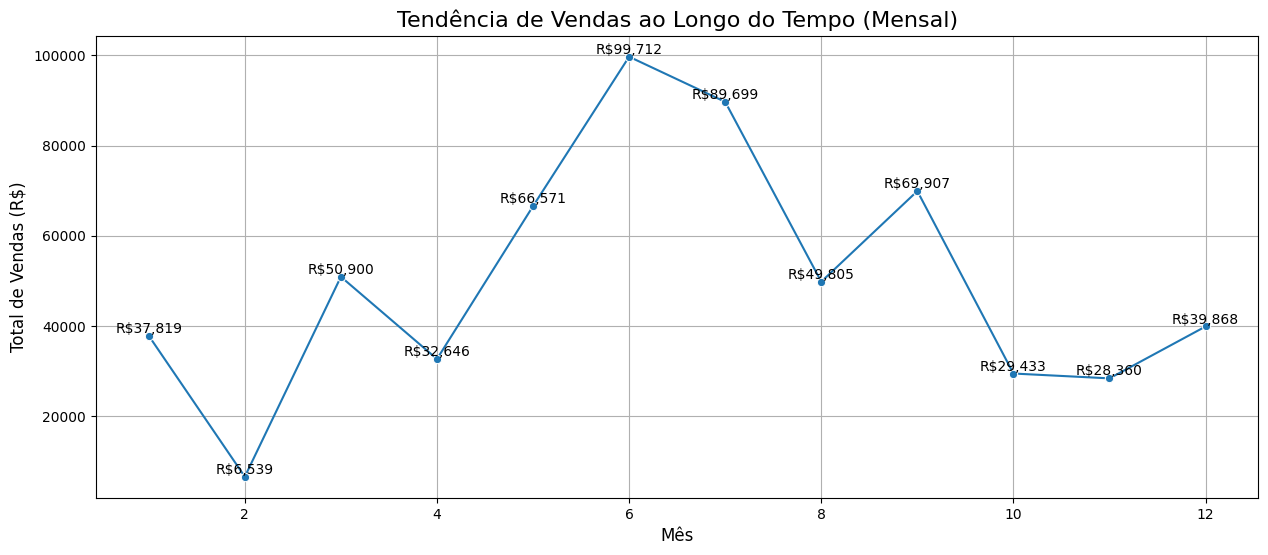

Insight 1: O mês com o maior total de vendas foi: 6.0 com R$99711.69
Insight 2: O mês com o menor total de vendas foi: 2.0 com R$6539.45


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset limpo
df_vendas = pd.read_csv("data_clean.csv")

# 1. Criar a coluna 'Total_Venda' como a quantidade * preço
df_vendas['Total_Venda'] = df_vendas['Quantidade'] * df_vendas['Preço']

# 2. Agrupar os dados por mês e somar o total de vendas
vendas_mensais = df_vendas.groupby('Mês')['Total_Venda'].sum().reset_index()

# 3. Criar o gráfico de linha
plt.figure(figsize=(15, 6))
sns.lineplot(x='Mês', y='Total_Venda', data=vendas_mensais, marker='o')

# 4. Adicionar rótulos nos pontos do gráfico (valores mensais)
for i in range(len(vendas_mensais)):
    plt.text(vendas_mensais['Mês'][i], vendas_mensais['Total_Venda'][i],
             f"R${vendas_mensais['Total_Venda'][i]:,.0f}",
             horizontalalignment='center', verticalalignment='bottom', fontsize=10)

# Ajustes no gráfico
plt.title('Tendência de Vendas ao Longo do Tempo (Mensal)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Vendas (R$)', fontsize=12)
plt.grid(True)
plt.show()

# Obter o mês com maior e menor total de vendas
mes_max_vendas = vendas_mensais.loc[vendas_mensais['Total_Venda'].idxmax()]
mes_min_vendas = vendas_mensais.loc[vendas_mensais['Total_Venda'].idxmin()]

# Imprimir insights
print(f"Insight 1: O mês com o maior total de vendas foi: {mes_max_vendas['Mês']} com R${mes_max_vendas['Total_Venda']:.2f}")
print(f"Insight 2: O mês com o menor total de vendas foi: {mes_min_vendas['Mês']} com R${mes_min_vendas['Total_Venda']:.2f}")



#2.SQL

Com base nas tabelas geradas no exercício anterior, escreva consultas SQL para:

●    Listar o nome do produto, categoria e a soma total de vendas (Quantidade * Preço) para cada produto. Ordene o resultado pelo valor total de vendas em ordem decrescente.

●    Identificar os produtos que venderam menos no mês de junho de 2024.

Salve suas consultas e a explicação da lógica em um arquivo chamado consultas_sql.sql.

In [ ]:
import sqlite3
import pandas as pd



In [ ]:
# Criar uma conexão com o banco de dados (no caso, em memória)
conn = sqlite3.connect(':memory:')  # Para armazenar no banco em memória
cursor = conn.cursor()  # Para executar comandos SQL


In [ ]:
# Criar tabelas no banco SQLite a partir do DataFrame
df_vendas.to_sql('vendas', conn, index=False, if_exists='replace')

# Verificar se a tabela foi criada corretamente
query = "SELECT * FROM vendas LIMIT 5;"
display(pd.read_sql(query, conn))


,ID,Data,Produto,Categoria,Quantidade,Preço,Mês,Total_Venda
0,ID-0001,2023-02-08 00:00:00.000000000,Pulseira Aura em Ouro Amarelo 18k com Citrinos,Pulseiras,7,520.21,2,3641.47
1,ID-0002,2023-06-02 00:00:00.000000000,Corrente Cadeado Alongada em Ouro Amarelo 18k,Correntes,10,223.23,6,2232.30
2,ID-0003,2023-04-29 00:00:00.000000000,Anel Celeste em Ouro Amarelo 18k com Diamantes,Anéis,3,1352.46,4,4057.38
3,ID-0004,2023-03-02 00:00:00.000000000,Pingente Religioso N.Sra.Aparecida em Ouro Ama...,Pingentes,6,872.45,3,5234.70
4,ID-0005,2023-10-16 00:00:00.000000000,Colar Chains Color em Prata 925 com Topázios L...,Colares,10,172.34,10,1723.40


In [ ]:
# Conteúdo do arquivo consultas_sql.sql
consulta_sql = """

-- Explicação: As duas consultas abaixo fazem parte do exercício solicitado.
-- A primeira lista os produtos com maior total de vendas;
-- E a segunda identifica os produtos que venderam menos no mês de junho de 2023.

-- Explicando a primeira consulta: O objetivo -> Listar nome do produto, a categoria e a soma total das vendas.
-- O total de vendas é calculado multiplicando a quantidade vendida pelo preço do produto.
-- O resultado é agrupado por produto e categoria, e ordenado pela soma das vendas de forma decrescente.

SELECT Produto,
       Categoria,
       SUM(Quantidade * Preço) AS Total_Vendas
FROM vendas
GROUP BY Produto, Categoria
ORDER BY Total_Vendas DESC;



-- Explicando a segunda consulta: O objetivo -> Identificar os produtos que venderam menos no mês de junho de 2023.
-- Realizei a total das vendas, sendo resultado da quantidade multiplicada pelo preço, para o período de 01/06/2023 a 30/06/2023.
-- O resultado então é ordenado do menor para o maior na coluna com o total de vendas junho.


SELECT Produto,
       SUM(Quantidade * Preço) AS Total_Vendas_Junho
FROM vendas
WHERE Data BETWEEN '2023-06-01' AND '2023-06-30'
GROUP BY Produto
ORDER BY Total_Vendas_Junho ASC;
"""


# Salvar em um arquivo .sql
with open('consultas_sql.sql', 'w') as file:
    file.write(consulta_sql)
print("Arquivo consultas_sql.sql salvo com sucesso!")



Arquivo consultas_sql.sql salvo com sucesso!


##2.1 Listar o nome do produto, categoria e a soma total de vendas (Quantidade * Preço) para cada produto. Ordene o resultado pelo valor total de vendas em ordem decrescente.

In [ ]:
# Executar a primeira consulta
consulta_1 = '''
SELECT Produto,
       Categoria,
       SUM(Quantidade * Preço) AS Total_Vendas
FROM vendas
GROUP BY Produto, Categoria
ORDER BY Total_Vendas DESC;
'''
display(pd.read_sql(consulta_1, conn))

,Produto,Categoria,Total_Vendas
0,Anel Celeste em Ouro Amarelo 18k com Diamantes,Anéis,73656.02
1,Anel Vivara em Ouro Amarelo 18k com Ágata Verd...,Anéis,55805.45
2,Corrente Veneziana em Ouro Branco 18k,Correntes,49969.16
3,Colar Chains Color em Prata 925 com Topázios L...,Colares,48587.03
4,Conjunto Especial Primavera em Ouro Branco 18k...,Conjuntos,46823.35
5,Brinco Baby Bolinha em Ouro Amarelo 18k,Brincos,41114.72
6,Corrente Cadeado Alongada em Ouro Amarelo 18k,Correntes,37865.98
7,Brinco Argola Bombe Gomos em Prata 925,Brincos,36150.57
8,Pulseira Fiori em Ouro Branco 18k com Diamantes,Pulseiras,27369.65
9,Pulseira Celeste em Ouro Amarelo 18k com Diama...,Pulseiras,22493.99


##2.2 Identificar os produtos que venderam menos no mês de junho de 2023.

In [ ]:
# Executar a segunda consulta
consulta_2 = '''
SELECT Produto,
       SUM(Quantidade * Preço) AS Total_Vendas_Junho
FROM vendas
WHERE Data BETWEEN '2023-06-01' AND '2023-06-30'
GROUP BY Produto
ORDER BY Total_Vendas_Junho ASC;
'''

display(pd.read_sql(consulta_2, conn))

,Produto,Total_Vendas_Junho
0,Corrente Cadeado Alongada em Ouro Amarelo 18k,2232.30
1,Pulseira Celeste em Ouro Amarelo 18k com Diama...,4245.71
2,Pulseira Fiori em Ouro Branco 18k com Diamantes,4357.90
3,Anel Verano em Prata 925 com Rodolita e Acitri...,4505.04
4,Pulseira Aura em Ouro Amarelo 18k com Citrinos,4769.70
5,Corrente Groumet em Ouro Amarelo 18k,6514.38
6,Pingente Cores em Ouro Amarelo 18k e Safira Azul,9222.75
7,Anel Celeste em Ouro Amarelo 18k com Diamantes,12538.75
8,Colar Chains Color em Prata 925 com Topázios L...,20769.33
9,Anel Vivara em Ouro Amarelo 18k com Ágata Verd...,28862.48


#3.Interpretação de Resultados

### Resumo Interpretativo dos Dados de Vendas

#### **Situação Inicial**
Antes da limpeza dos dados:
- Não foram encontrados registros duplicados.
- Houve **9 registros com datas inválidas ou ausentes**, além de **3 valores faltantes** na coluna de **Data**.
- A análise identificou que o **mês com maior volume de vendas** foi **junho (mês 6)**, com um total de R$99.711,69.

* Já o **mês com menor volume de vendas** foi **fevereiro (mês 2)**, com R$6.539,45.

---

#### **Limpeza e Correções**
- **Datas inválidas:** Foram corrigidas substituindo pelos valores médios das datas válidas.
- **Dados faltantes:** Todos os valores ausentes foram preenchidos, resultando em um dataset completamente limpo.
- Não houve alterações nos registros duplicados, pois nenhum foi encontrado.

---

#### **Insights Após Limpeza**

1. **Produtos com maiores vendas:**
   - **Anel Celeste em Ouro Amarelo 18k com Diamantes** lidera com R$77.317,94
   
     em vendas totais, seguido pela **Corrente Veneziana em Ouro Branco 18k** (R$51.398,20).
   - Produtos de maior ticket médio incluem acessórios em ouro e com pedras preciosas.

2. **Categorias de maior destaque:**
   - **Anéis** foram a categoria mais vendida, acumulando R$128.262,95.

   - **Correntes** e **Brincos** aparecem logo em seguida, com R$111.266,51 e R$83.596,38 respectivamente.

3. **Mês a mês:**
   - **Junho (mês 6):** Destacou-se com o maior volume de vendas, totalizando R$101.020,82  e 88 unidades vendidas.

   - **Fevereiro (mês 2):** Apresentou o menor volume de vendas, com apenas 9 unidades comercializadas e R$8.861,40.

---

#### **Resumo de Métricas**

1. **Desempenho por Produto (Top 3):**
   - **Anel Celeste em Ouro Amarelo 18k com Diamantes**: R$77.317,94 (71 unidades).
   
   - **Corrente Veneziana em Ouro Branco 18k**: R$51.398,20 (38 unidades).
   
   - **Colar Chains Color em Prata 925 com Topázios London e Safiras**: R$46.926,92 (47 unidades).

2. **Categorias (Top 3):**
   - **Anéis**: 117 unidades, R$128.262,95.
   
   - **Correntes**: 99 unidades, R$111.266,51.
  
   - **Brincos**: 74 unidades, R$83.596,38.

3. **Desempenho por Mês (Top 3):**
   - **Junho (mês 6):** R$101.020,82 (88 unidades).
   
   - **Julho (mês 7):** R$92.131,28 (109 unidades).
   
   - **Setembro (mês 9):** R$65.236,94 (59 unidades).

---

#### **Conclusões**
- **Joias de alta qualidade e com pedras preciosas** são os itens mais valorizados pelos consumidores.
- A categoria **Anéis** domina em vendas, mostrando preferência por itens refinados e de alta durabilidade.
- Os meses de maior movimento, como junho e julho, podem estar associados a sazonalidades, como presentes para datas comemorativas. Fevereiro, com baixas vendas, reflete um período mais retraído.
- Investir em marketing direcionado para categorias com menor desempenho (como pulseiras e pingentes) pode ser uma oportunidade para equilibrar o portfólio.

